## Handwritten digits classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
plt.rcParams['figure.figsize']=[15,8]

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')

In [7]:
X = dataset.data

In [14]:
y = dataset.target.values

In [15]:
y = np.int64(y)

In [9]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = X.values

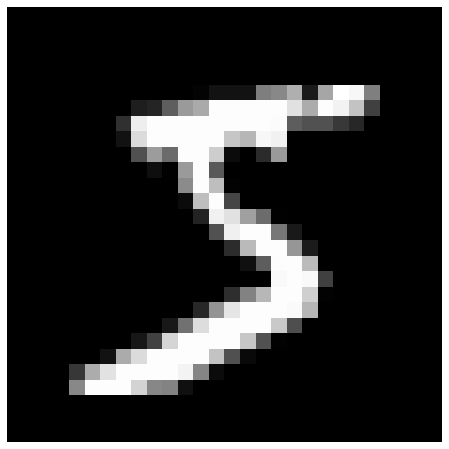

In [13]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

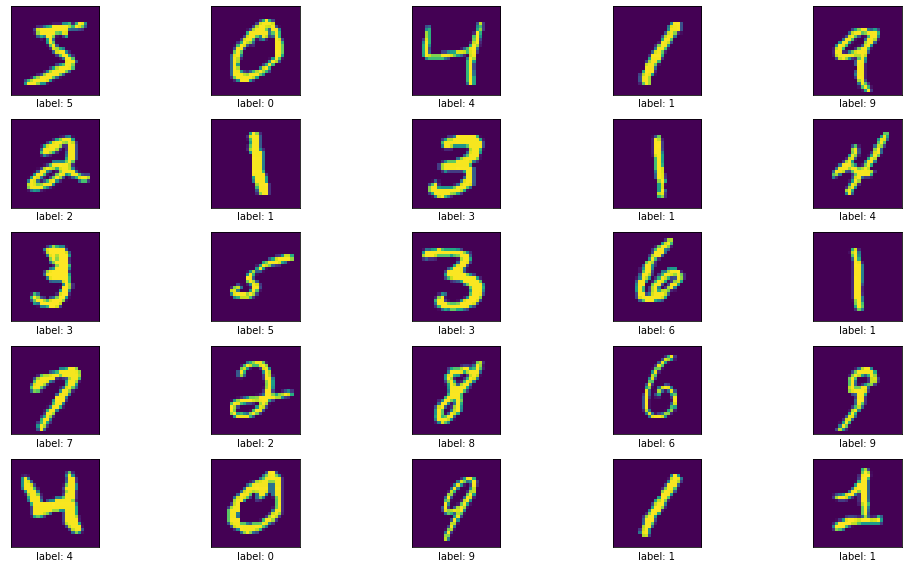

In [16]:
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i].reshape(28,28))
    plt.xlabel('label: {}'.format(y[i]))
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =10)

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [21]:
print(nb.score(X_train, y_train)) # 54.8%
print(nb.score(X_test, y_test)) # 55.4%

0.5646857142857142
0.5584


In [22]:
# NB is underfitting the data. Naive Bayes algo is not suitable
# for image recognition


In [23]:
y_pred = nb.predict(X_test)

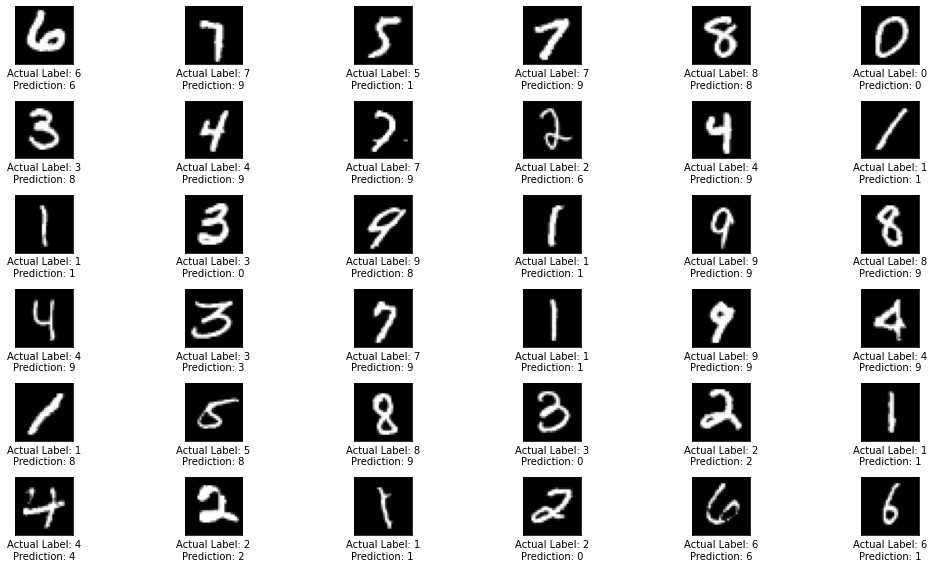

In [24]:
# The prediction results are the following

for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    plt.xlabel('Actual Label: {}\nPrediction: {}'.format(y_test[i], y_pred[i]))
plt.tight_layout()
plt.show()

In [25]:
# Experimenting with Boosting Ensemble

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [27]:
print(ada.score(X_train, y_train)) # 71.2%
print(ada.score(X_test, y_test)) # 70.8%

0.7184952380952381
0.7133714285714285


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

In [29]:
print(rf.score(X_train, y_train)) # 97%
print(rf.score(X_test, y_test)) # 95%

0.9789333333333333
0.9518857142857143


In [30]:
y_pred_rf = rf.predict(X_test)

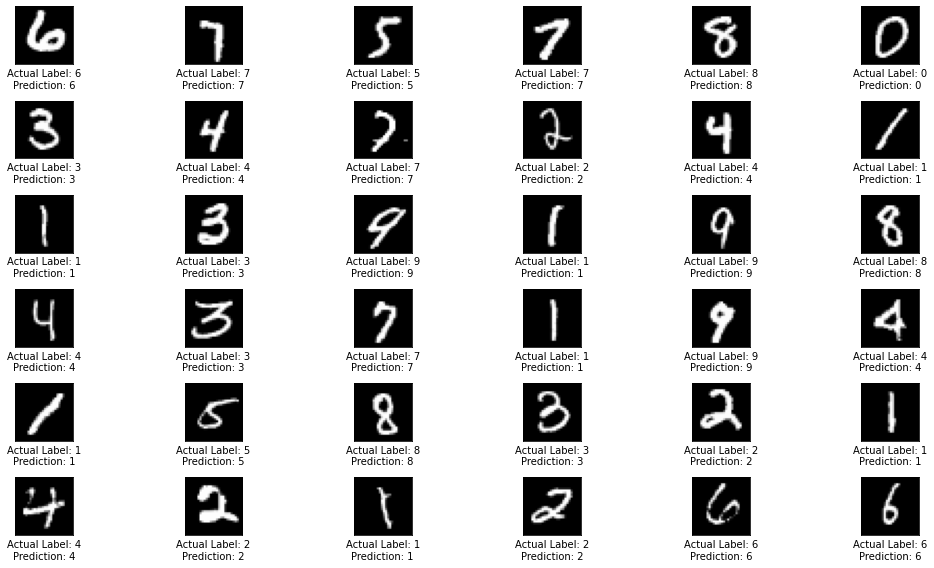

In [31]:
# The prediction results are the following

for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    plt.xlabel('Actual Label: {}\nPrediction: {}'.format(y_test[i], y_pred_rf[i]))
plt.tight_layout()
plt.show()

In [33]:
# Feasibility analysis
# Dimensional Reduction - PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()
pca.fit(X_train)

PCA()

In [39]:
axis = (pca.explained_variance_ratio_)

In [40]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [41]:
cumsum

array([0.09747931, 0.16884805, 0.23002508, 0.28407411, 0.33293867,
       0.37621848, 0.40900873, 0.43784579, 0.46553901, 0.48904729,
       0.5100286 , 0.53044989, 0.54759891, 0.56456817, 0.58036398,
       0.59521497, 0.6083604 , 0.62115158, 0.63303108, 0.64462626,
       0.65529015, 0.66538253, 0.67494856, 0.68405922, 0.69289374,
       0.70129613, 0.7094319 , 0.7173294 , 0.72470918, 0.73155686,
       0.73815764, 0.74458818, 0.75058306, 0.7564231 , 0.7620902 ,
       0.76752896, 0.77254447, 0.77741543, 0.78220278, 0.7868822 ,
       0.79142279, 0.7958835 , 0.80006488, 0.80403142, 0.80788514,
       0.8116505 , 0.81527443, 0.81876646, 0.82213103, 0.82533502,
       0.82852242, 0.83163309, 0.83458275, 0.83746051, 0.84029446,
       0.84300949, 0.84568462, 0.84825353, 0.8508019 , 0.85325534,
       0.8556599 , 0.85805318, 0.86034514, 0.86253866, 0.86467248,
       0.86673629, 0.86876869, 0.87072526, 0.8726384 , 0.87452512,
       0.87639213, 0.8781906 , 0.87995306, 0.88168137, 0.88332

In [45]:
d = np.argmax(cumsum >= 0.95)+1
d

154

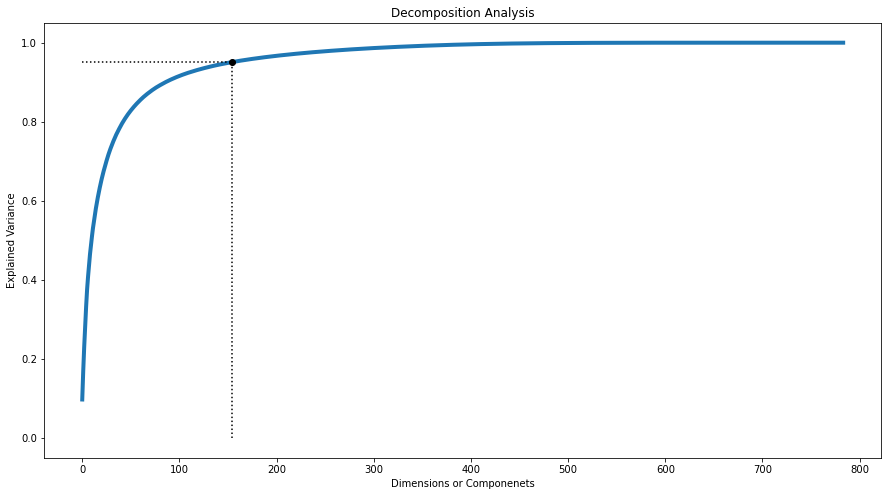

In [49]:
plt.plot(cumsum, linewidth = 4)
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.xlabel('Dimensions or Componenets')
plt.ylabel('Explained Variance')
plt.title('Decomposition Analysis')
plt.show()

In [52]:
pca_154 = PCA(n_components=0.95)
X_train_pca = pca_154.fit_transform(X_train)

In [53]:
X_test_pca = pca_154.transform(X_test)

In [55]:
rf = RandomForestClassifier(max_depth = 11)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=11)

In [56]:
print(rf.score(X_train_pca, y_train)) # 97%
print(rf.score(X_test_pca, y_test)) # 95%

0.9686095238095238
0.9209714285714286


In [60]:
# Insight: We have reduced the features by 1/5 of its value
# and haven't compromised a lot with the accuracy of the algorithm

In [ ]:
# Pca is also used for compression and data sharing, so we could freeze 154 dimension data along 
# with the pca object and share it over a network.
# It is possible to recover the original data (some loss)
# using the PCA object

In [61]:
X_train_recovered = pca.inverse_transform(X_train_pca)
X_test_recovered = pca.inverse_transform(X_test_pca)

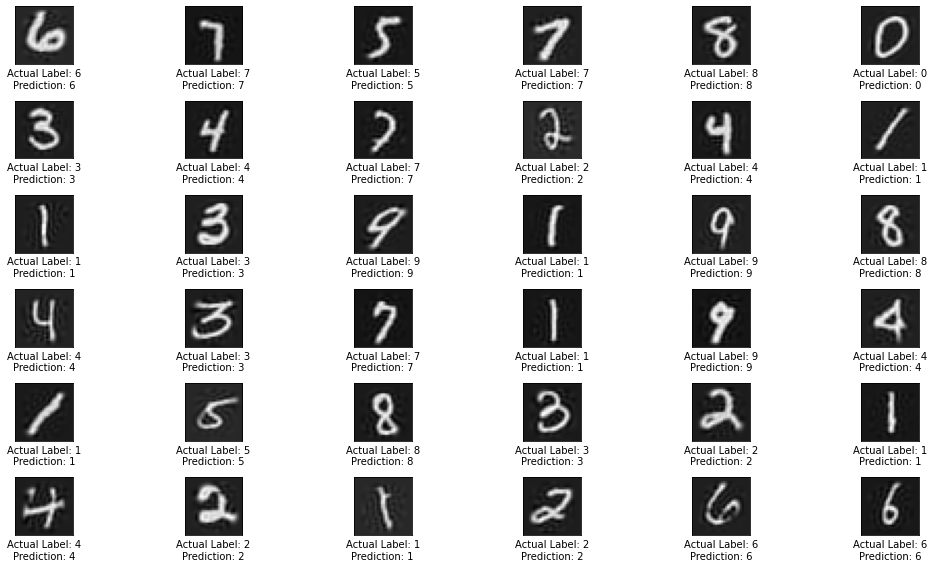

In [62]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test_recovered[i].reshape(28, 28), cmap = 'gray')
    plt.xlabel('Actual Label: {}\nPrediction: {}'.format(y_test[i], y_pred_rf[i]))
plt.tight_layout()
plt.show()

In [63]:
# After conducting the Post-hoc analysis, we can confirm that
# recovered images can be still be easily recognized